In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import os
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
from sklearn.preprocessing import LabelEncoder
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from shapely.geometry import Point
from scipy import stats
import scipy
import joblib
# import geopandas

In [ ]:
data_train = pd.read_csv('C:\SI22\Width\wdth_v_median_train_PUB.csv')

train = data_train.drop(columns=[ 'site_no','Unnamed: 0','COMID','FTYPE','dec_lat_va','dec_long_va','xsec_area_va', 'mean_vel_va',
                                  'Mean_D','SedFluxKgs', 'Avg_K', 'Avg_P', 'Avg_Sin','HUC2','max_vel_va', 'mean_depth_va', 'max_depth_va'])
data_test = pd.read_csv("C:\SI22\Width\stream_wdth_all_data_trimmed_v3_MEDIAN_test_PUB.csv")
test = data_test.drop(columns=[ 'site_no','Unnamed: 0','COMID','FTYPE','dec_lat_va','dec_long_va','xsec_area_va', 'mean_vel_va',
                               'Mean_D','SedFluxKgs', 'Avg_K', 'Avg_P', 'Avg_Sin','HUC2','max_vel_va', 'mean_depth_va', 'max_depth_va'])
train = train.dropna(axis=0)
test = test.dropna(axis=0)

In [ ]:
train.isnull().sum()

q_va                          0
AI1                           0
MINELEVSMO                    0
percent_sand1km_0_100cm       0
Percent_Clay1km_0_100cm       0
Percent_Silt_1km100cmfinal    0
SLOPE                         0
StreamOrde                    0
D50[mm]                       0
EVI_JAS_2012                  0
TotDASqKM                     0
NLCD_developed_16             0
NLCD_forest_16                0
NLCD_agriculture_16           0
CAT_POPDENS10                 0
ACC_NDAMS2010                 0
stream_wdth_va                0
EVI_JFM_2012                  0
dtype: int64

In [ ]:
train = train[train['q_va'] > 0]
test = test[test['q_va'] > 0]
(test['q_va'] < 0).sum().sum()

0

In [ ]:
print(train.shape)
train = train[train['stream_wdth_va'] != 22000.000000]
print(train.shape)

(6501, 18)
(6500, 18)


In [ ]:
X_train = train.drop(columns=['stream_wdth_va'])
X_test = test.drop(columns=['stream_wdth_va'])

y_train = train[["stream_wdth_va"]]
y_test = test[["stream_wdth_va"]]

In [ ]:
#Gridsearch 
param_grid = {'max_depth': range(5,15,2),
                 'max_features': ['auto'],
                 "min_samples_leaf": range(3,8,1),
                 'min_samples_split': [2, 4, 8, 10],
                 'n_estimators':range(30,100,10)}
forest = RandomForestRegressor( n_jobs=-3, 
                                random_state=42) # 100 decision trees
grid = GridSearchCV(forest, param_grid, cv=4,n_jobs=-3, verbose=True,scoring="neg_root_mean_squared_error")
grid.fit(X_train, y_train)
# select the best hyperparameters
best_params = grid.best_params_

# use the selected hyperparameters to define a random forest estimator
best_forest = RandomForestRegressor (n_estimators=best_params['n_estimators'], n_jobs=-3, 
                                      max_features=best_params['max_features'], 
                                      min_samples_leaf=best_params["min_samples_leaf"],
                                      min_samples_split=best_params['min_samples_split'],
                                      max_depth=best_params['max_depth'], random_state=42)
best_forest.fit(X_train, y_train)
# filename = 'finalized_model_RF_PUB.sav'
# joblib.dump(best_forest, path+filename)
print (grid.best_params_, grid.best_score_)
predict=best_forest.predict(X_test) # make predictions on the test dataset
predict_train=best_forest.predict(X_train) # make predictions on the training dataset


Fitting 4 folds for each of 700 candidates, totalling 2800 fits


C:\Users\zahraghahremani\Miniconda3\envs\SI\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\zahraghahremani\AppData\Local\Temp\ipykernel_19584\612466226.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_forest.fit(X_train, y_train)


{'max_depth': 11, 'max_features': 'auto', 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 90} -242.16946004737073


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
lineStart=0
lineEnd=predict_train.max()
plt.scatter(y_train,predict_train,color='lightskyblue',alpha=0.5,edgecolor='steelblue', label = 'train')
plt.scatter(y_test,predict, color="lightcoral",alpha=0.7,edgecolor='darkred', label = 'test')
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], '--', color = 'black',linewidth=2.5) # 45 degree line
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
plt.xlabel('True W [ft] ')
plt.ylabel('Predicted W [ft] ')
plt.legend()
plt.title('linear')
plt.show()

NameError: name 'predict_train' is not defined

<Figure size 288x288 with 0 Axes>

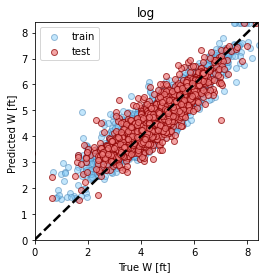

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
lineStart=0
lineEnd=np.log(predict_train.max())
plt.scatter(np.log(y_train),np.log(predict_train),color='lightskyblue',alpha=0.5,edgecolor='steelblue',label = 'train')
plt.scatter(np.log(y_test),np.log(predict), color="lightcoral",alpha=0.7,edgecolor='darkred', label = 'test')
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], '--', color = 'black',linewidth=2.5) # 45 degree line
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
plt.xlabel('True W [ft] ')
plt.ylabel('Predicted W [ft] ')
plt.legend()
plt.title('log')
plt.show()

In [ ]:
print("NSE")
print(sklearn.metrics.r2_score(y_train, predict_train))
print(sklearn.metrics.r2_score(y_test,predict))
print("R2")
slope, intercept, r, p, se = scipy.stats.linregress(y_train['stream_wdth_va'],predict_train)
print(r**2)
slope, intercept, r, p, se = scipy.stats.linregress(y_test['stream_wdth_va'],predict)
print(r**2)
print("log-r2")
slope, intercept, r, p, se = scipy.stats.linregress(np.log(y_train['stream_wdth_va']),np.log(predict_train))
print(r**2)
slope, intercept, r, p, se = scipy.stats.linregress(np.log(y_test['stream_wdth_va']),np.log(predict))
print(r**2)
print("mse")
print(sklearn.metrics.mean_squared_error(y_train,predict_train))
print(sklearn.metrics.mean_squared_error(y_test,predict))
print("mae")
print(sklearn.metrics.mean_absolute_error(y_train,predict_train))
print(sklearn.metrics.mean_absolute_error(y_test,predict))
print('pmbe')
MBE_train = ((np.sum(y_train- predict_train))/len(predict_train))/np.mean(y_train)*100
MBE = ((np.sum(y_test- predict))/len(predict))/np.mean(y_test)*100
print(MBE_train)
print(MBE)

NSE


NameError: name 'predict_train' is not defined

In [ ]:
import os
import joblib

In [ ]:
joblib.dump(best_forest, "./RFM.joblib")

NameError: name 'best_forest' is not defined

In [ ]:
import os 
os.getcwd()

'C:\\SI22\\Width\\RF'

In [ ]:
loaded_rf = joblib.load("C:\\SI22\RFM.joblib")

In [ ]:
loaded_rf.predict(X_train)

array([110.4066712 , 530.36552971, 266.60442004, ...,  23.85807129,
        49.44415859,  83.00593452])

In [ ]:
importances = best_forest.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
X_train.columns = ['Q','Aridity I','MINELEVSMO','%Sand','%Clay','%Silt',
 'Slope',
 'StreamOrde',
 'D50',
 'EVI_JAS_2012',
 'TotDASqKM',
 'NLCD_developed_16',
 'NLCD_forest_16',
 'NLCD_agriculture_16',
 'CAT_POPDENS10',
 'ACC_NDAMS2010',
 'EVI_JFM_2012']
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 0 (0.825374)
2. feature 10 (0.057052)
3. feature 1 (0.020668)
4. feature 16 (0.012618)
5. feature 15 (0.012202)
6. feature 2 (0.009492)
7. feature 13 (0.008930)
8. feature 4 (0.007874)
9. feature 11 (0.007604)
10. feature 8 (0.007366)
11. feature 9 (0.005763)
12. feature 5 (0.005516)
13. feature 12 (0.004931)
14. feature 14 (0.004822)
15. feature 3 (0.004041)
16. feature 6 (0.003362)
17. feature 7 (0.002387)


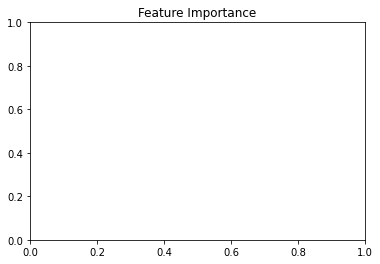

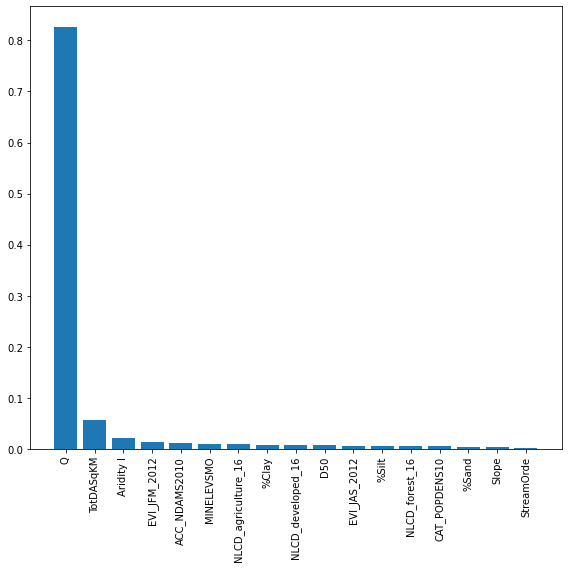

In [ ]:
plt.title('Feature Importance')
plt.figure(figsize=(8,8))
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
# plt.show()